Author : Russell Rupok
Department : Msc in IS student and Graduate Research Student with IDEA Lab Research Center, Athabasca University

Version: 1.0

Date: 2022/09/12


Project Description

File No: 24904

Project Title: Supporting Online Learners’ Motivation through Technology-enabled Collaborations and
Assessment


Principal Investigator: Dr. Levina Yuen (Faculty of Humanities & Social Sciences\Centre for
Interdisciplinary Studies)

Start Date: 2022/09/12
End Date: 2022/12/30

Keywords: online learning, motivation, technology, collaboration, assessment


Project Description:

As a digital-first university, understanding the barriers and challenges faced by online learners, and how this affects learner motivation, is a key component to assessing future services and infrastructures to support student success at AU. An important but often overlooked challenge in higher education is how to design and integrate technologies for learning that enhances accessibility, motivation and engagement in online courses. Using emerging cloud-based technologies and collaborative tools offered by AWS, this project will address the following questions: 

(1) How do we, as educators and designers, use technology enabled collaborative tools and assessments to create an online environment that better supports learner’s access and motivation in AU courses? (e.g., Universal Design for Learning, Self- Determination Theory of competency, autonomy and relatedness) 

(2) What key factors contribute to an online learners' success and sustained motivation over the course of their graduate program (2-6 years for MEd or EdD programs)? 

Technology Used: 
This project includes multiple stages and experimentation with AWS cloud-based tools:

Stage 1: Research and explore AWS tools’ that support online learner:

(a)Access and capacity-building (e.g., Amazon Lexicon or chatbots to provide guidance about program options to choose from; thesis project or ePortfolio route)

(b)Collaboration and engagement (e.g., online lab/virtual space to share research projects including resourceintensive files, games and videos)(c)Assessment practices (e.g., alternative assessments, options for instructor or peer feedback)

Next Step:

Based on the findings of this research, the next step will be to further explore the role of technology and design choices to enhance motivation in online learning.



--Programing Languge :
- Program is written in Python . 

- Few Python Modules used in modeling: 
        # Text blob : TextBlob is a Python (2 and 3) library for processing textual data. 
                        #URL : https://textblob.readthedocs.io/en/dev/index.html
    
        # Pandas : pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
                        #URL: https://pandas.pydata.org/
            
        # re : This module provides regular expression matching operations similar to those found in Perl.
                        #URL: https://docs.python.org/3/library/re.html
            
        # nltk : NLTK is a leading platform for building Python programs to work with human language data.
                     #URL: https://www.nltk.org/
            
        # Seaborn: Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
                    #URL: https://seaborn.pydata.org/index.html
            
        # wordcloud: Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.
                    #URL: https://amueller.github.io/word_cloud/
        # matplotlib: Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
                    #URL: https://matplotlib.org/
        # 

In [4]:
# importing python modules 

import textblob
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud,STOPWORDS
from textblob import classifiers
from textblob.classifiers import NaiveBayesClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rrupok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
pwd

'C:\\Users\\rrupok\\Job Scrapping and Data Set Modeling\\Katie_AffordableHousing'

In [6]:
df=pd.read_excel("C:/Users/rrupok/Levina_StudentForum/StudentDiscussion_currentfile.xlsx") # local directory of the file
df.head()

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation
0,MDDE_601_Fall21_A,24,Advice please- Emergency online learning (again!),4,6,4,8,4,"Hey class,\n\nMy kiddos (grade 1 & 2) are bac..."
1,MDDE_601_Fall21_A,24,AU Disaster contingency for Students affected ...,4,0,2,0,0,\nThis is the annotation margin. See the anno...
2,MDDE_601_Fall21_A,24,(Education) - (Face-to-Face) = Distance Educat...,7,5,4,24,1,This is the annotation margin. See the annotat...
3,MDDE_601_Fall21_A,24,So nice....,1,0,4,0,0,\nThis is the annotation margin. See the anno...
4,MDDE_601_Fall21_A,24,Good Luck!!!,7,0,1,0,0,Good Luck!!!\n \nThis is the annotation margin...


Observation:
    
    -There are 492 rows of conversation entries from 5 difefrent class between Fall 2021 and 2022.
    - Each conversation ( column "conversation") started with a single student post with replies 
      from other student
    - Some classes were more active than others 
    

In [7]:
#regex pattern: by(?:.* -) or /by(?:.* -.*)/ or by(?:.* -.*) - this to remove the writter's name

In [8]:
#regex pattern : Per(?:.*) - this is to remove the comment Permalink | Reply | Print Post | Print Topic

In [9]:
# craeted custom function to remove any names and Permalink | Reply | Print Post | Print Topic
def pattern_text(text1):   
    #pattern = r"by(?:.* -.*)or Per(?:.*)"
    text_comm=re.sub(r"by(?:.* -.*)" or r"Per(?:.*)",'',str(text1))
    return text_comm


df['conversation_s']=df['conversation'].apply(lambda x:pattern_text(x))

Note:
    -program to remove any left over studnt names , MOOC word count and reapete subject from the actual post .
    - A new column is created with the clean data called " conversation_s"

In [10]:
df.info() # shows data type and memory information of the actual data
print("Total Rows in this dataset:",df.shape[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   semester          492 non-null    object
 1   totalparticipent  492 non-null    int64 
 2   topic             492 non-null    object
 3   weekday           492 non-null    int64 
 4   totalreply        492 non-null    int64 
 5   posttime          492 non-null    int64 
 6   daystoreply       492 non-null    int64 
 7   mostactivetime    492 non-null    int64 
 8   conversation      492 non-null    object
 9   conversation_s    492 non-null    object
dtypes: int64(6), object(4)
memory usage: 38.6+ KB
Total Rows in this dataset: 492


In [11]:
df.shape[0] # counting the rows in spread sheet 

492

In [12]:
# calculating the polarity from conversation_s on each conversation
pol=lambda x:TextBlob(x).sentiment.polarity
df['polarity']=round(df['conversation_s'].apply(pol),3)
df.head()

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation,conversation_s,polarity
0,MDDE_601_Fall21_A,24,Advice please- Emergency online learning (again!),4,6,4,8,4,"Hey class,\n\nMy kiddos (grade 1 & 2) are bac...","Hey class,\n\nMy kiddos (grade 1 & 2) are bac...",0.113
1,MDDE_601_Fall21_A,24,AU Disaster contingency for Students affected ...,4,0,2,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.192
2,MDDE_601_Fall21_A,24,(Education) - (Face-to-Face) = Distance Educat...,7,5,4,24,1,This is the annotation margin. See the annotat...,This is the annotation margin. See the annotat...,0.098
3,MDDE_601_Fall21_A,24,So nice....,1,0,4,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.220
4,MDDE_601_Fall21_A,24,Good Luck!!!,7,0,1,0,0,Good Luck!!!\n \nThis is the annotation margin...,Good Luck!!!\n \nThis is the annotation margin...,0.286


Observation :
    - A sentiment analysis was completed on each row and result are kept in seperate column on the same spread sheet called " polarity"
    

In [14]:
# convert the polairty score to positive , negative or neutral
df['sentiment']=np.select([df['polarity'] > 0, df['polarity'] == 0], ["positive", "neutral"], "negative")
df.head()

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation,conversation_s,polarity,sentiment
0,MDDE_601_Fall21_A,24,Advice please- Emergency online learning (again!),4,6,4,8,4,"Hey class,\n\nMy kiddos (grade 1 & 2) are bac...","Hey class,\n\nMy kiddos (grade 1 & 2) are bac...",0.113,positive
1,MDDE_601_Fall21_A,24,AU Disaster contingency for Students affected ...,4,0,2,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.192,positive
2,MDDE_601_Fall21_A,24,(Education) - (Face-to-Face) = Distance Educat...,7,5,4,24,1,This is the annotation margin. See the annotat...,This is the annotation margin. See the annotat...,0.098,positive
3,MDDE_601_Fall21_A,24,So nice....,1,0,4,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.220,positive
4,MDDE_601_Fall21_A,24,Good Luck!!!,7,0,1,0,0,Good Luck!!!\n \nThis is the annotation margin...,Good Luck!!!\n \nThis is the annotation margin...,0.286,positive


In [15]:
print(df['sentiment'].value_counts())

positive    487
negative      3
neutral       2
Name: sentiment, dtype: int64


In [12]:
df.to_excel('modified.xlsx') # checking the data if this is correct format

In [13]:
df.describe() # summary of statistical for numerial columns

,totalparticipent,weekday,totalreply,posttime,daystoreply,mostactivetime,polarity
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,21.684959,3.758130,3.174797,2.979675,7.089431,2.371951,0.184238
std,2.925472,2.070163,2.527634,0.895561,8.891295,2.406260,0.071764
min,17.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-0.041000
25%,18.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.141750
50%,23.000000,4.000000,3.000000,3.000000,5.000000,2.000000,0.181000
75%,24.000000,6.000000,4.000000,4.000000,9.000000,4.000000,0.223000
max,24.000000,7.000000,15.000000,4.000000,80.000000,7.000000,0.531000


Observation: 
    - This observation is based on all 5 classes
    - On average student took 7 days to reply each post
    - There were replies that took almost 3 months. Probably that students were not that active in the class
    - On Average student Sentiment was "positive" in the class with a score of "0.1842" 
    

In [14]:
semesterstats=df.groupby("semester") # group the data by semester column


In [15]:
semesterstats.describe().head()

totalparticipent                                           \
                             count  mean  std   min   25%   50%   75%   max   
semester                                                                      
MDDE_601_F21_B               111.0  23.0  0.0  23.0  23.0  23.0  23.0  23.0   
MDDE_601_Fall21_A            110.0  24.0  0.0  24.0  24.0  24.0  24.0  24.0   
MDDE_601_Fall21_C            113.0  24.0  0.0  24.0  24.0  24.0  24.0  24.0   
MDDE_601_W22_A                80.0  17.0  0.0  17.0  17.0  17.0  17.0  17.0   
MDDE_601_W22_B                78.0  18.0  0.0  18.0  18.0  18.0  18.0  18.0   

                  weekday            ... mostactivetime      polarity  \
                    count      mean  ...            75%  max    count   
semester                             ...                                
MDDE_601_F21_B      111.0  3.567568  ...           4.50  7.0    111.0   
MDDE_601_Fall21_A   110.0  3.518182  ...           4.00  7.0    110.0   
MDDE_601_Fall21_C   113.0  3.964602  ...           4.00  7.0    113.0   
MDDE_601_W22_A       80.0  4.112500  ...           5.25  7.0     80.0   
MDDE_601_W22_B       78.0  3.705128  ...           3.00  7.0     78.0   

                                                                               
                       mean       std    min      25%     50%      75%    max  
semester                                                                       
MDDE_601_F21_B     0.180757  0.078805 -0.026  0.13800  0.1730  0.20500  0.531  
MDDE_601_Fall21_A  0.188209  0.070604 -0.041  0.15125  0.1915  0.22250  0.494  
MDDE_601_Fall21_C  0.189947  0.065807 -0.001  0.16000  0.1950  0.23000  0.352  
MDDE_601_W22_A     0.187425  0.069000  0.000  0.14200  0.1835  0.23825  0.350  
MDDE_601_W22_B     0.172051  0.074020  0.027  0.12500  0.1595  0.21075  0.397  

[5 rows x 56 columns]

 Observation:
     - Datas are grouped by semester 
     - We see lower number of student in 2021 to the year 2022
     - 2021 semesters had more negetive sentiment( comments) than 2022
     - students in year 2022 were activly positive in the conversation

In [16]:
#semesterstats.to_excel('semesterstats_ex.xlsx')

matplotlib.text.Text

<Figure size 720x432 with 0 Axes>

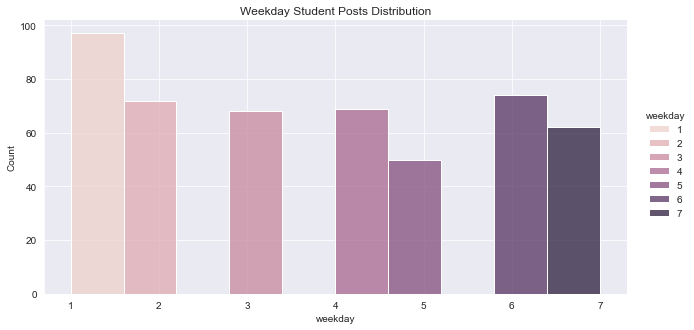

In [20]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
distplt=sns.displot(data=df,x='weekday',
                    hue='weekday',
                    multiple="stack",
                    height=4.5, 
                    aspect=2.00)
distplt=plt.title("Weekday Student Posts Distribution")
#plt.show()

type(distplt)


# Dist Plot: visualizing the univariate or bivariate distribution of data
Weekdays were in the following order:
Sunday is 1, Monday is 2, Tuesdayis 3, Wednesday is 4, Thursday is 5,Friday is 6, Saturday: 7

Observation:
- Plot to find distribution of active weekdays 
- Most Actives days of the weeks is Sunday ( 1) and Friday (6)
- Thursday is the least active of all 


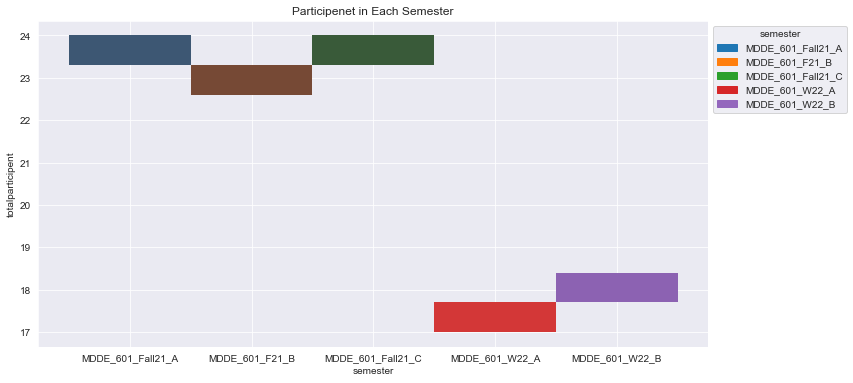

In [133]:
sns.set_style("darkgrid")

plt.figure(figsize=(12,6))
#student=df.totalparticipent.value_counts()
countplt=sns.histplot(data=df,x=df.semester,y=df.totalparticipent,hue=df.semester)
plt.title("Participenet in Each Semester")
type(countplt)

sns.move_legend(countplt,"upper left",bbox_to_anchor=(1,1))

Objervation:
    -Plot to find count of students in each semester so we can observe if the numbers are increasing or decreasing
    - We see a sudden increase of students in 2022 so had to create two sections to accomodate
    - This allign with student positive polarity score in these semesters than the previous year ( 2021)
    - Probably Students were more motivated to come back to school in 2022
    
- A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.

- kde: If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).

- cumulative:If True, plot the cumulative counts(add up the values as you go) as bins increase.


matplotlib.text.Text

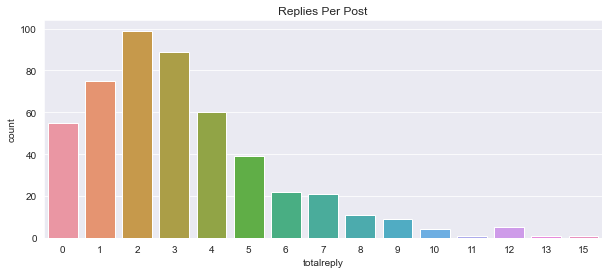

In [25]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
countplt=sns.countplot(data=df,x=df.totalreply)
countplt=plt.title('Replies Per Post')

type(countplt)

Observation: 
    - Plot to observe how active the students were based on a post 
    - Post with 2 and 3 replies had the most occurence
    - this also concludes not all the student in the class reply to the same post 
    - Course instructor could make mandatory replies to create more interaction
    - We also see a large number of student posts do have "0" replies
    
#Tool Used: 
 - seaborn.countplot: Show the counts of observations in each categorical bin using bars.

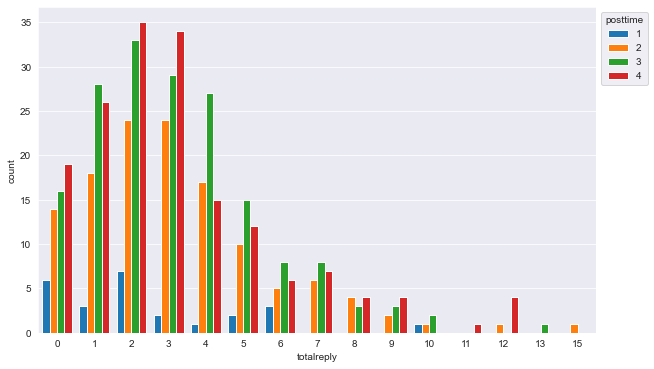

In [34]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
countplt=sns.countplot(data=df,x=df.totalreply,hue=df.posttime,saturation=3.75)
#countplt=plt.title('Most Active Day Time ')
type(countplt)
sns.move_legend(countplt,"upper left",bbox_to_anchor=(1,1))

- Posting Hours were calculated as :
12am-5.59am: 1;
6am-11:59am: 2;
12pm-5:59pm: 3;
6:00pm-11:59pm: 4

Observation:
- Plot to observe relationship between totalreplies with the post time of the day
- Posts with 2 and 3 replies between 6:00pm-11:59pm (4) got most attention from other students
- 12am-5.59am ( 1) was least active time of the day

matplotlib.text.Text

<Figure size 1008x576 with 0 Axes>

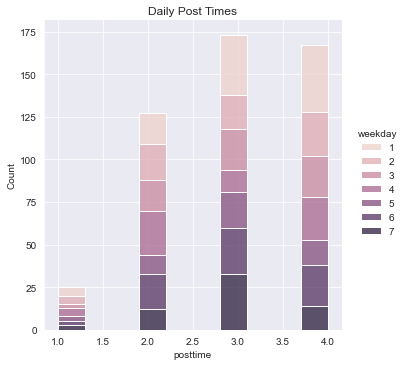

In [41]:
sns.set_style("darkgrid")
plt.figure(figsize=(14,8))
distplt=sns.displot(data=df,x='posttime',
                    hue='weekday',
                    multiple="stack")
                    #height=3.5, 
                    #aspect=2.5)
distplt=plt.title("Daily Post Times")
type(distplt)


- Posting Hours were calculated as : 12am-5.59am: 1; 6am-11:59am: 2; 12pm-5:59pm: 3; 6:00pm-11:59pm: 4
- Weekdays were in the following order: Sunday is 1, Monday is 2, Tuesdayis 3, Wednesday is 4, Thursday is 5,Friday is 6, Saturday: 7

-- Observation:
- Plot to compare weekdays and post time to identify any relationship 
- Post  12pm-5:59pm: 3 was most active in any of the days


seaborn.axisgrid.PairGrid

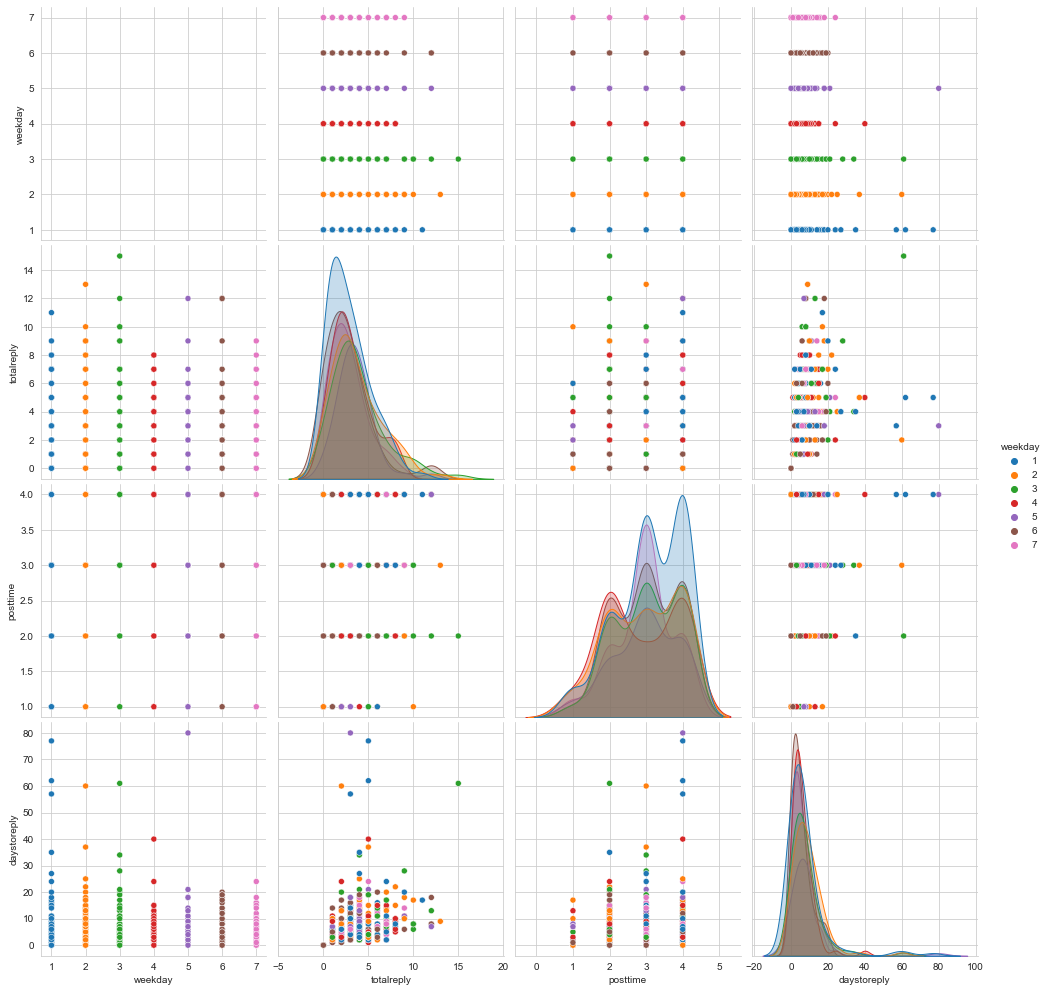

In [100]:
sns.set_style("whitegrid")
pairplt=sns.pairplot(data=df,
                     x_vars=['weekday','totalreply','posttime','daystoreply'],
                     y_vars=['weekday','totalreply','posttime','daystoreply'],
                     hue='weekday',
                     palette='tab10',
                     height=3.5)
#pairplt=plt.title("Plot pairwise relationships in Student dataset")
type(pairplt)


In [29]:
#sns.move_legend(scatterplt,"upper left")

matplotlib.axes._subplots.AxesSubplot

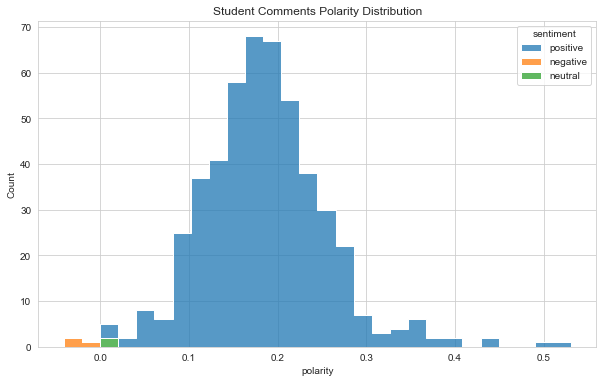

In [44]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
histplt=sns.histplot(data=df,x='polarity',
             hue='sentiment',
             stat='count',cumulative=False,
                  element='step',
            multiple="stack")

hist=plt.title("Student Comments Polarity Distribution")

type(histplt)

Observation : 
- We observe the polarity ( setiment) distribution betweens students comments
- Majority of student comments were positive meaning they did overall like the course content and discussion

--Tool:
- A histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall within discrete bins.
- kde: If True, compute a kernel density estimate to smooth the distribution and show on the plot as (one or more) line(s).
- cumulative:If True, plot the cumulative counts(add up the values as you go) as bins increase.


In [1272]:
#sns.scatterplot(data=df,x='sentiment',size='polarity')

In [1273]:
#sns.pairplot(data=df, hue="polarity")

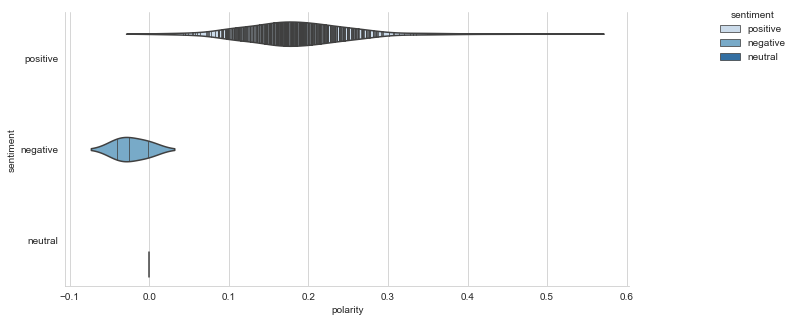

In [47]:
sns.set_style("whitegrid")
catplt=sns.catplot(data=df, x="polarity", 
            y="sentiment", 
            hue='sentiment',
            kind="violin",
            inner="stick",
            palette="Blues",
            height=4.50,
            aspect=2
            #kind='swarm'
           )
#catplt=plt.title("Sentiment Distribution")

type(catplt)
sns.move_legend(catplt,"upper left",bbox_to_anchor=(1,1))
catplt.savefig("Sentiment Distribution.png") 

--Observation:
- This category plot is showing the distribution number of polarity from studnets comments. 
- Higher the polarity number means they were very positive on that post
- Most polarity is starts from 0.1 and around 0.2 . We get the polarity score calculating each sentense polarity
       and averaging them with the total number of sentenses on that post. 
- Return the polarity score as a float within the range [-1.0, 1.0]
- This also tells us there were mixer of negetive and positive emotion on each post.

--Python Module:
- seanborn.catplot
- This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations. 

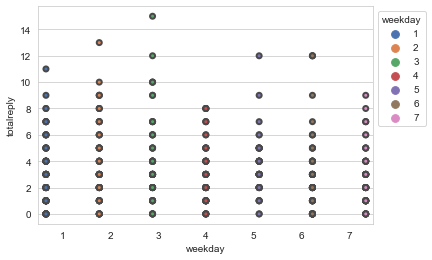

In [34]:
sns.set_style("whitegrid")
#plt.figure(figsize=(16,6))
strpplt=sns.stripplot(data=df, 
              hue='weekday',
              palette='deep',
              y='totalreply',
              x="weekday",
              jitter=False,
              dodge=True,
              linewidth=2.0,
            
              )

#swarmplt=plt.title('Student Reply by days')
type(strpplt)
sns.move_legend(strpplt,"upper left",bbox_to_anchor=(1,1))

seaborn.axisgrid.FacetGrid

<Figure size 1008x288 with 0 Axes>

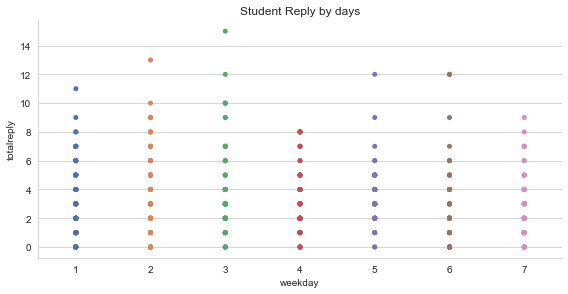

In [51]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,4))
catplt=sns.catplot(data=df, 
              hue='weekday',
              palette='deep',
              y='totalreply',
              x="weekday",
              jitter=False,
              height=4, aspect=2.0
                  )
swarmplt=plt.title('Student Reply by days')
type(catplt)
#sns.move_legend(catplt,"upper left",bbox_to_anchor=(1,1))


- Weekdays were in the following order: Sunday is 1, Monday is 2, Tuesdayis 3, Wednesday is 4, Thursday is 5,Friday is 6, Saturday: 7

--Observation:
- We compare the weekdays and total post to identify any relationship 
- Tuesday ( 3) was most active compare to total student reply 
- Wednesday ( 4) was the least active day of the week compare to student replies

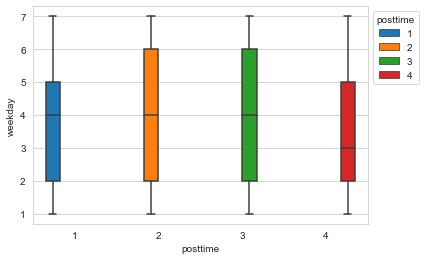

In [50]:
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
boxplt=sns.boxplot(data=df, 
                   x='posttime',
                   y='weekday',
                   hue='posttime',
                   saturation=1,
                   width=.70)
type(boxplt)
sns.move_legend(boxplt,"upper left",bbox_to_anchor=(1,1))
#boxplt=plt.title('Most Discussed Time of the Day')
#boxplt=plt.legend([1,2,3,4],['12am-5.59am','6am-11:59am','12pm-5:59pm','6:00pm-11:59pm'])
#plt.legend(1)
#sns.set_palette(flatui)
#boxplt=plt.xlim(0,4)

--Observation :
- 75 percent of post were between day 2 -6 
- post time 2 and 3 had the highest ditribution of days in between them


Python Seaborn Module :
- box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

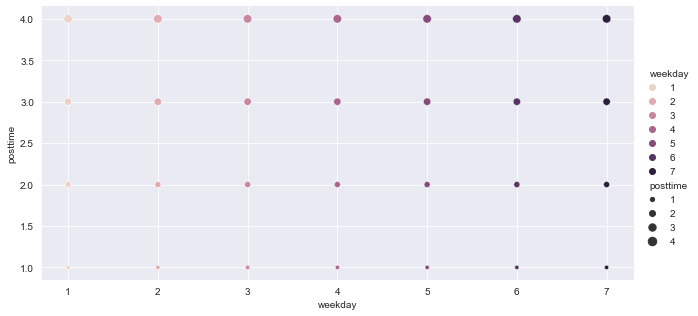

In [53]:
sns.set_style("darkgrid")
relplt=sns.relplot(data=df,y='posttime',
                   x='weekday',hue='weekday',
                   size='posttime',
                   height=4.5, 
                   aspect=2,
                   kind='scatter',
                   #col='weekday',
                   legend=True)
#relplt=plt.title(" Postime vs WeekDay")
#relplt=sns.color_palette("OrRd_r")
#relplt=sns.xlim(1,4,1)

NLP Analysis and Model Creation. NLP analysis and model will be based on student convesation on each semester. 
Column "conversation_s" is the primary column that wil be part of the analysis

In [54]:
df.head(5)

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation,conversation_s,polarity,sentiment
0,MDDE_601_Fall21_A,24,Advice please- Emergency online learning (again!),4,6,4,8,4,"Hey class,\n\nMy kiddos (grade 1 & 2) are bac...","Hey class,\n\nMy kiddos (grade 1 & 2) are bac...",0.113,positive
1,MDDE_601_Fall21_A,24,AU Disaster contingency for Students affected ...,4,0,2,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.192,positive
2,MDDE_601_Fall21_A,24,(Education) - (Face-to-Face) = Distance Educat...,7,5,4,24,1,This is the annotation margin. See the annotat...,This is the annotation margin. See the annotat...,0.098,positive
3,MDDE_601_Fall21_A,24,So nice....,1,0,4,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.220,positive
4,MDDE_601_Fall21_A,24,Good Luck!!!,7,0,1,0,0,Good Luck!!!\n \nThis is the annotation margin...,Good Luck!!!\n \nThis is the annotation margin...,0.286,positive


In [55]:
df.isnull() # checking if there is any null value in any rows, nul values will distrupt creatinf the actual model

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation,conversation_s,polarity,sentiment
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
487,False,False,False,False,False,False,False,False,False,False,False,False
488,False,False,False,False,False,False,False,False,False,False,False,False
489,False,False,False,False,False,False,False,False,False,False,False,False
490,False,False,False,False,False,False,False,False,False,False,False,False


# lowering the text on "conversation_s"

In [56]:
def lowertext(text):
    lower_case=(text.lower())
    return lower_case

df['conversation_s_low']=df['conversation_s'].apply(lambda x:lowertext(x))
df.head(5)

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation,conversation_s,polarity,sentiment,conversation_s_low
0,MDDE_601_Fall21_A,24,Advice please- Emergency online learning (again!),4,6,4,8,4,"Hey class,\n\nMy kiddos (grade 1 & 2) are bac...","Hey class,\n\nMy kiddos (grade 1 & 2) are bac...",0.113,positive,"hey class,\n\nmy kiddos (grade 1 & 2) are bac..."
1,MDDE_601_Fall21_A,24,AU Disaster contingency for Students affected ...,4,0,2,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.192,positive,\nthis is the annotation margin. see the anno...
2,MDDE_601_Fall21_A,24,(Education) - (Face-to-Face) = Distance Educat...,7,5,4,24,1,This is the annotation margin. See the annotat...,This is the annotation margin. See the annotat...,0.098,positive,this is the annotation margin. see the annotat...
3,MDDE_601_Fall21_A,24,So nice....,1,0,4,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.220,positive,\nthis is the annotation margin. see the anno...
4,MDDE_601_Fall21_A,24,Good Luck!!!,7,0,1,0,0,Good Luck!!!\n \nThis is the annotation margin...,Good Luck!!!\n \nThis is the annotation margin...,0.286,positive,good luck!!!\n \nthis is the annotation margin...


In [57]:
#dir(string)

#Removing punctuation so we can go back to to the original( dictionary) format of the text and work.

In [58]:
def remove_punctuation(txt):
    text_nopunt="".join([c for c in txt if c not in string.punctuation])
    return text_nopunt
df["conversation_nopunc"]=df["conversation_s_low"].apply(lambda x:remove_punctuation(x))
df.head(5)

,semester,totalparticipent,topic,weekday,totalreply,posttime,daystoreply,mostactivetime,conversation,conversation_s,polarity,sentiment,conversation_s_low,conversation_nopunc
0,MDDE_601_Fall21_A,24,Advice please- Emergency online learning (again!),4,6,4,8,4,"Hey class,\n\nMy kiddos (grade 1 & 2) are bac...","Hey class,\n\nMy kiddos (grade 1 & 2) are bac...",0.113,positive,"hey class,\n\nmy kiddos (grade 1 & 2) are bac...",hey class\n\nmy kiddos grade 1 2 are back on...
1,MDDE_601_Fall21_A,24,AU Disaster contingency for Students affected ...,4,0,2,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.192,positive,\nthis is the annotation margin. see the anno...,\nthis is the annotation margin see the annot...
2,MDDE_601_Fall21_A,24,(Education) - (Face-to-Face) = Distance Educat...,7,5,4,24,1,This is the annotation margin. See the annotat...,This is the annotation margin. See the annotat...,0.098,positive,this is the annotation margin. see the annotat...,this is the annotation margin see the annotati...
3,MDDE_601_Fall21_A,24,So nice....,1,0,4,0,0,\nThis is the annotation margin. See the anno...,\nThis is the annotation margin. See the anno...,0.220,positive,\nthis is the annotation margin. see the anno...,\nthis is the annotation margin see the annot...
4,MDDE_601_Fall21_A,24,Good Luck!!!,7,0,1,0,0,Good Luck!!!\n \nThis is the annotation margin...,Good Luck!!!\n \nThis is the annotation margin...,0.286,positive,good luck!!!\n \nthis is the annotation margin...,good luck\n \nthis is the annotation margin se...


In [59]:
df.to_excel('modified1.xlsx')

In [60]:
#dir(wordcloud)

In [67]:
nltkstopwrd=(stopwords.words('english'))
nltkstopwrd


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [68]:
# created a custom stop work list to remove stop words from our analysis . This is based on our project

stop_words = stopwords.words('english')
new_stopwords = ["say", "would", "another", "also","said" ,"daily",
                 "says","could","see","much","thats","even","mr","help","make","top",
                "new","page","click","x","annotation","drop","able","may"]
stop_words.extend(new_stopwords)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

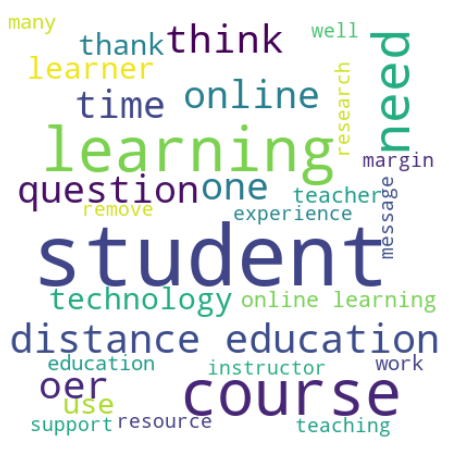

In [71]:
# created a worldcloud from "conevrsation_s" coulmn removing stop word.
#world cloud representing text data in which the size of each word indicates its frequency or importance.

text="".join(df['conversation_nopunc'])
wordcloud = WordCloud(stopwords=stop_words,height=400,width=400,max_words=30, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[10,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig("worldcloud.png") 

Observation : 
    - A program ws run to identyfy the most imporatnt words to the student. 
      Any word with bigger font means most number occurences this has in teh whole corpus.
    - This program were run removing any stop words ( i.e. i, me , you etc) 
      from each conversation, NLTK is used and this tool kit has 153 stop word in total
      
    - Fist 10 most imporant words to students including " technology", 'time','need', 'learner', 'distance education'

In [70]:
training=[('It’s been quite the week, but our home and our family are safe.','pos'),
          ('I love this sandwich.','pos'),
          ('This is an amazing place!','pos'),
          ('I do not like this restaurant','neg'),
          ('I love this sandwich.','pos'),
          ('I am not thrilled at the prospect of doing several hours of online learning with my 6 & 7 year old each evening','neg'),
          ('I am obligated to report to work so the time constraints of trying to complete what the school is sending home to complete online is just not feasible','pos'),
          ('Accessibility can be a challenge for learners in this new digital age. ','pos'),
          ('Thanks for raising this. I’ll be posting about this Sunday morning.','pos'),
          ('The conversation around OER has been around its success despite the challenges that students face when they are learning at a distance.','pos'),
          ('I believe an area that would benefit from more research is teacher training to operate in an online environment','pos'),
          ('It was just a matter of time that distance learning was to be part of our lives. It came quickly due to the pandemic and there was a sudden shift especially with schools. However, it can be implied that we can use blended learning for our systems as well as equip our teachers with the skills needed to use online technology to enhance learning process for students. ','neg'),
          ('Wes Anderson is my favorite director!','neg'),
          ('Captain America 2 is pretty awesome.','neg'),
          ('Fantastic Mr Fox is an awesome film!','neg'),

]

testing = [
('For the first part it would be good to know how distance learning can be implemented and where it has been implement. ','pos'),
("He ain't from around here.", 'neg'),
('OER was originally implemented in a hybrid fashion, meaning the integrity of the original course was intact, but used OER to fully exploit its advantages.','pos')
]

In [116]:
classifier = classifiers.NaiveBayesClassifier(training)

In [53]:
print(classifier.accuracy(testing))
classifier.show_informative_features(4)

0.6666666666666666
Most Informative Features
      contains(learning) = True              neg : pos    =      2.4 : 1.0
           contains(not) = True              neg : pos    =      2.4 : 1.0
            contains(of) = True              neg : pos    =      2.4 : 1.0
          contains(this) = True              pos : neg    =      2.1 : 1.0


In [1308]:
blob=TextBlob(''' This opens options for creative learning options that did not exist prior to the pandemic. For example, most nursing education programs had limited to no integration of online learning prior to the pandemic, 
especially in terms of clinical learning (Melrose et al., 2021). 
Many institutions were forced to move to online simulations to ensure students were able to graduate on time (Leaver et al., 2022). As many institutions often cannot accommodate clinical placements for the volume of students required, even prior to the pandemic, online clinical learning makes a great post-pandemic remedy (Leaver et al., 2022). 
This evidence-based and creative replacement of clinical learning is a great example of how future online learning could look for many disciplines (Leaver et al., 2022).''',classifier=classifier)
blob.classify()

'pos'

# Deep Learning Model with TensorFlow/Keras

In [16]:
# this part is extra and does not to add with the actual data analysis

In [17]:
from keras.preprocessing.text import one_hot
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding